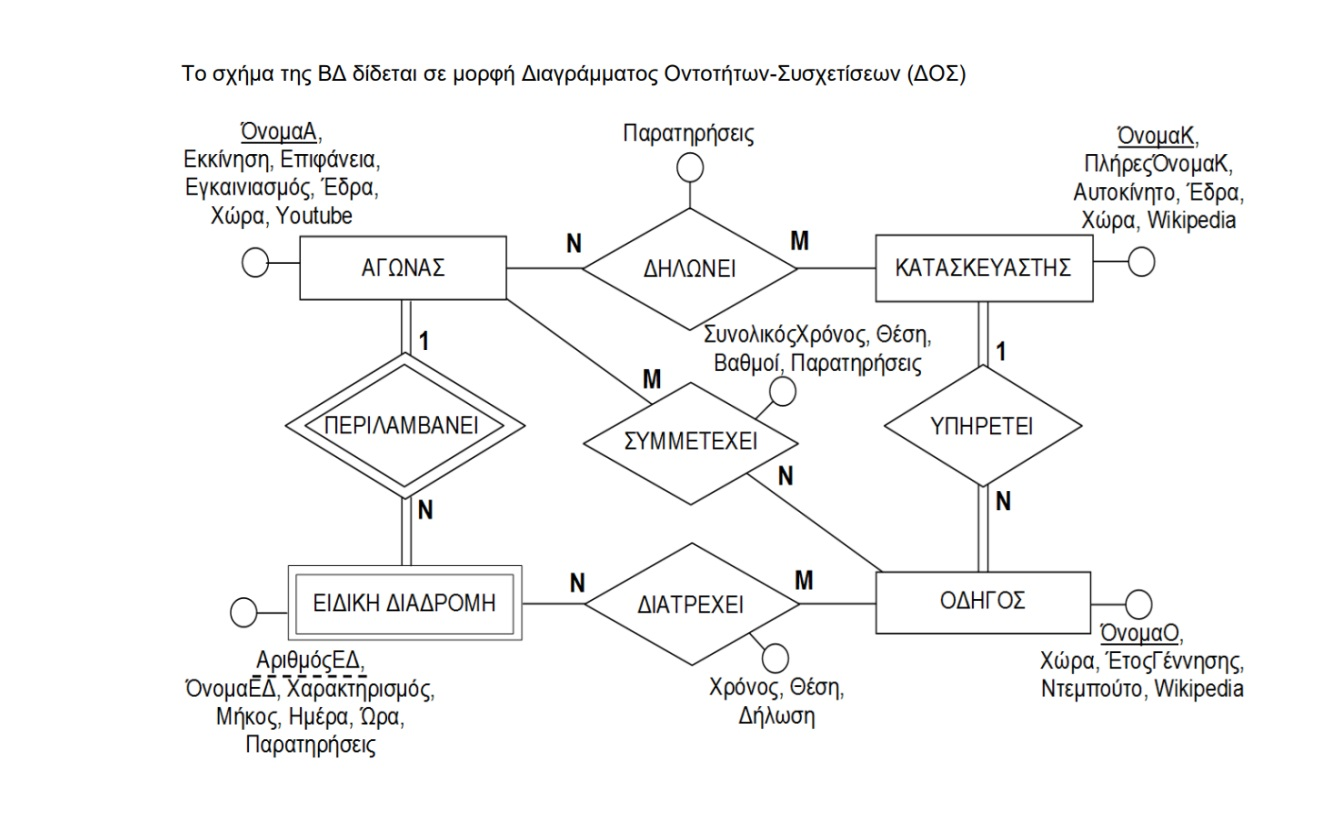

In [ ]:
# Εγκατάσταση της βιβλιοθήκης RSQLite
install.packages("RSQLite")
library(RSQLite)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plogr’




In [ ]:
# Δημιουργία της βάσης δεδομένων SQLite
sqlite  <- dbDriver("SQLite")
if(file.exists("rally_database.db")) {
    try( dbDisconnect(con) )
    file.remove("rally_database.db")
}
con <- dbConnect(sqlite, "rally_database.db")


[1] TRUE

In [ ]:
# Δημιουργία των πινάκων
con <- dbConnect(SQLite(), "rally_database.db")


# Ορισμός του πίνακα Driver
sql <- "CREATE TABLE Driver (
	     nameD TEXT NOT NULL,
       Country TEXT,
       Year_of_Birth INTEGER,
       Debut_Year INTEGER,
       Wiki_URL TEXT,
		   PRIMARY KEY (nameD) );"
dbExecute(con, sql)


#εισαγωγή τιμών στον πίνακα Driver
sql <- "INSERT INTO Driver (nameD, Country, year_of_Birth,Debut_Year,Wiki_URL) VALUES
('Sebastien Ogier', 'France', 1983,2000, 'https://en.wikipedia.org/wiki/S%C3%A9bastien_Ogier'),
('Thierry Neuville', 'Belgium', 1988,2002, 'https://en.wikipedia.org/wiki/Thierry_Neuville'),
('Ott Tänak', 'Estonia', 1987,2005, 'https://en.wikipedia.org/wiki/Ott_T%C3%A4nak'),
('Elfyn Evans', 'United Kingdom', 1988,2007,'https://en.wikipedia.org/wiki/Elfyn_Evans'),
('Dani Sordo', 'Spain', 1983,2008, 'https://en.wikipedia.org/wiki/Dani_Sordo'),
('Lewis Hamilton', 'United Kingdom',2003,1985, 'https://en.wikipedia.org/wiki/Lewis_Hamilton'),
('Valtteri Bottas', 'Finland', 1989,2008, 'https://en.wikipedia.org/wiki/Valtteri_Bottas'),
('Sebastian Vettel', 'Germany', 1987,2015, 'https://en.wikipedia.org/wiki/Sebastian_Vettel'),
('Charles Leclerc', 'Monaco', 1997,2012, 'https://en.wikipedia.org/wiki/Charles_Leclerc'),
('Pierre-Louis','France',1997,2015,'https://en.wikipedia.org/wiki/Pierre-Louis_Loubet')"
dbExecute(con, sql)

[1] 0

[1] 10

In [ ]:
# Ορισμός του πίνακα Races
sql <- "CREATE TABLE Races (
    nameR TEXT UNIQUE,
    Surface TEXT,
    Date INTEGER,
    Location TEXT,
    Headquarters TEXT,
    Country TEXT,
    Youtube_Link TEXT,
    PRIMARY KEY (nameR)
  );"
dbExecute(con, sql)


#εισαγωγή τιμών στον πίνακα Races
sql_race <- "INSERT INTO Races (nameR, Surface, Location, Headquarters, Country, Youtube_Link, Date) VALUES
('Safari Kenya', 'Gravel', 'Nairobi, Kenya', 'Safari Park', 'Kenya', 'youtube.com/...', '2023-07-10 10:00:00'),
('Acropolis', 'Gravel', 'Athens, Greece', 'Athens', 'Greece', 'youtube.com/...', '2022-09-02 11:30:00'),
('Dakar', 'Mixed', 'Various Locations', 'Various', 'Various', 'youtube.com/...', '2020-11-18 09:00:00'),
('Argentina', 'Gravel', 'Cordoba, Argentina', 'Cordoba', 'Argentina', 'youtube.com/...', '2019-05-05 09:30:00'),
('Finland', 'Gravel', 'Jyväskylä, Finland', 'Jyväskylä', 'Finland', 'youtube.com/...', '2024-07-28 12:00:00')"
dbExecute(con, sql_race)



[1] 0

[1] 5

In [ ]:
# Ορισμός του πίνακα Manufacturers
sql <- "CREATE TABLE Manufacturers (
    nameM TEXT UNIQUE,
    car TEXT,
    Headquarters TEXT,
    Location TEXT,
    Country TEXT,
    Youtube_Link TEXT,
    PRIMARY KEY (nameM)
 );"
dbExecute(con, sql)

#εισαγωγή τιμών στον πίνακα Manufacturers
sql <- "INSERT INTO Manufacturers (nameM, car, Headquarters, Location, Country, Youtube_Link) VALUES
('Toyota Gazoo Racing', 'Toyota', 'Japan', 'Nairobi, Kenya', 'Kenya', 'youtube.com/...'),
('Hyundai Motorsport', 'Hyundai', 'Germany', 'Athens, Greece', 'Greece', 'youtube.com/...'),
('M-Sport Ford', 'Ford', 'UK', 'Various Locations', 'Various', 'youtube.com/...'),
('Citroen Racing', 'Citroen', 'France', 'Versailles, France', 'France', 'youtube.com/...'),
('MSport Ford', 'Ford', 'UK', 'Dovenby Hall, Cumbria', 'UK', 'youtube.com/...'),
('Yaris WRC Racing', 'Toyota', 'Japan', 'Helsinki, Finland', 'Finland', 'youtube.com/...'),
('Suzuki Motorsport', 'Suzuki', 'Japan', 'Osaka, Japan', 'Japan', 'youtube.com/...'),
('Rally Team Germany', 'Volkswagen', 'Germany', 'Wolfsburg, Germany', 'Germany', 'youtube.com/...'),
('Hoonigan Racing Division', 'Ford', 'USA', 'Petaluma, California', 'USA', 'youtube.com/...')"
dbExecute(con, sql)

[1] 0

[1] 9

In [ ]:
# Ορισμός του πίνακα Special_Stages
sql <- "CREATE TABLE Special_Stages (
    Stage_ID INTEGER,
    Stage_Name TEXT,
    Day TEXT,
    Time TEXT,
    Length REAL,
    comments TEXT,
    PRIMARY KEY (Stage_ID)
 );"
dbExecute(con, sql)


sql <- "INSERT INTO Special_Stages (Stage_ID, Stage_Name, Day, Time, Length, comments) VALUES
(1, 'Col de Turini ', '2023-07-10', '10:00:00', 30.5, 'Technical stage with tight corners'),
(2, 'Torsby', '2024-07-11', '09:30:00', 25.2, 'Fast stage with long straights'),
(3, 'ggggg', '2024-07-12', '11:15:00', 20.8, 'Mixed terrain with gravel and asphalt'),
(4, 'Stages of Hell', '2024-01-20', '08:00:00', 26.7, 'Technical stage with mixed surface conditions'),
(5, 'Mountain Rush', '2024-05-12', '10:30:00', 28.9, 'Rough terrain and challenging uphill sections'),
(6, 'Desert Blast', '2024-09-22', '09:45:00', 24.6, 'High-altitude stage with fast gravel roads'),
(7, 'Coastal Challenge', '2024-04-08', '11:00:00', 22.3, 'Scenic route along the coastline with sharp turns'),
(8, 'Snowy Summit', '2024-02-15', '09:15:00', 31.8, 'Snow-covered roads and icy conditions'),
(9, 'Forest Fury', '2024-06-30', '10:45:00', 26.5, 'Narrow forest trails with unpredictable terrain')"
dbExecute(con, sql)


[1] 0

[1] 9

In [ ]:
#Πινακες-σχέσεις
#Πινακας Συμμετέχει: Αποθηκεύει πληροφορίες σχετικά με τη συμμετοχή των οδηγών σε κάθε αγώνα. Αγώνας-οδηγός
#Περιλαμβάνει πληροφορίες όπως τον συνολικό χρόνο, τη θέση, τους βαθμούς και παρατηρήσεις.

sql <- "CREATE TABLE Participates (
    nameD TEXT,
    nameR TEXT,
    TotalTime TEXT,
    Position INTEGER,
    Points INTEGER,
    Comments TEXT,
    FOREIGN KEY (nameD) REFERENCES Drivers(nameD),
    FOREIGN KEY (nameR) REFERENCES Races(nameR)
);"

dbExecute(con, sql)



#Πίνακας Περιλαμβάνει:Αποθηκεύει πληροφορίες για το πώς ένας αγώνας ράλι περιλαμβάνει μία ειδική διαδρομή. Αγώνας- ειδική διαδρομή
sql <- "CREATE TABLE Includes (
    nameR INTEGER,
    StageID INTEGER,
    FOREIGN KEY (nameR) REFERENCES Races(nameR),
    FOREIGN KEY (StageID) REFERENCES Special_Stages(Stage_ID),
    PRIMARY KEY (nameR, StageID)
)"
dbExecute(con, sql)
#Πίνακας Υπηρετει:Αποθηκεύει πληροφορίες σχετικά με τη σχέση μεταξύ κατασκευαστών και οδηγών.Κατασκευαστής-Οδηγός
sql <- "CREATE TABLE Serves (
    nameM TEXT,
    nameD TEXT,
    FOREIGN KEY (nameM) REFERENCES Manufacturers(nameM),
    FOREIGN KEY (nameD) REFERENCES Driver(nameD)

);"
dbExecute(con, sql)
#Πίνακας Δηλώνει: Αγώνας-Κατασκευαστής
sql <- "CREATE TABLE Race_Manufacturer (
    nameR Text,
    nameM TEXT,
    Observations TEXT,
    FOREIGN KEY (nameR) REFERENCES Races(nameR),
    FOREIGN KEY (nameM) REFERENCES Manufacturers(nameM)
);"
dbExecute(con, sql)
#Πίνακας διατρέχει SpecialStage_Driver (Ειδική Διαδρομή-Οδηγός):
sql <- "CREATE TABLE SpecialStage_Driver (
    Stage_ID INTEGER,
    nameD TEXT,
    Total_Time TEXT,
    Position ,
    Declaration TEXT,
    FOREIGN KEY (Stage_ID) REFERENCES Special_Stages(Stage_ID),
    FOREIGN KEY (nameD) REFERENCES Driver(nameD)
);"
dbExecute(con, sql)

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

In [ ]:
con <- dbConnect(SQLite(), "rally_database.db")
#Πίνακας Συμμετέχει (Participates)
sql <- "INSERT INTO Participates (nameD, nameR, TotalTime, Position, Points, Comments)
        VALUES ('Sebastien Ogier', 'Monte Carlo Rally', '03:12:45', 1, 25, 'Excellent performance'),
               ('Dani Sordo', 'Monte Carlo Rally', '04:40:45', 6, 5, NULL),
               ('Sebastien Ogier', 'Sweden Rally', '02:58:00', 2, 18, 'Solid finish despite technical issues'),
               ('Sebastien Ogier', 'Safari Kenya', '02:45:00', 1, 25, 'Outstanding performance'),
               ('Thierry Neuville','Rally Sweden', '02:58:33', NULL, 18, 'did not finish'),
               ('Ott Tänak', 'Safari Kenya', '02:34:20', NULL, 0, 'did not finish'),
               ('Lewis Hamilton', 'Safari Kenya', '04:26:10', 3, 10, 'Excellent performance in tough conditions'),
               ('Ott Tänak', 'Monte Carlo Rally', '03:08:10', 4, 12, 'Recovered well after early issues'),
               ('Thierry Neuville', 'Monte Carlo Rally', '03:15:00', 2, 18, 'Strong performance on icy roads'),
               ('Thierry Neuville', 'Sweden Rally', '03:00:00', 1, 25, 'First place finish in challenging conditions'),
               ('Ott Tänak', 'Sweden Rally', '03:20:00', 3, 15, 'Consistent performance throughout the event'),
               ('Ott Tänak', 'Safari Kenya', '02:50:00', 2, 18, 'Fastest stage times on rough terrain'),
               ('Elfyn Evans', 'Safari Kenya', '02:35:10', 4, 12, NULL),
               ('Dani Sordo', 'Safari Kenya', '02:40:45', 5, 10, NULL),
               ('Lewis Hamilton', 'Acropolis', '03:25:15', 1, 25, 'Excellent performance in tough conditions'),
               ('Valtteri Bottas', 'Acropolis', '03:30:10', 2, 18, 'Solid performance overall'),
               ('Sebastian Vettel', 'Argentina', '04:10:20', 1, 25, 'Dominant performance on gravel roads'),
               ('Sebastian Vettel', 'Finland', '03:11:40', 2, 20, NULL),
               ('Pierre-Louis', 'Argentina', '04:12:30', 2, 18, 'Consistent performance throughout the event')";

dbExecute(con, sql)
#Πίνακας Περιλαμβάνει (Includes)
sql <- "INSERT INTO  Includes (nameR, StageID)
VALUES ('Safari Kenya', 1), ('Safari Kenya', 2), ('Safari Kenya', 3), ('Safari Kenya', 4), ('Safari Kenya', 5),
('Acropolis', 1), ('Acropolis', 2), ('Acropolis', 3), ('Acropolis', 4), ('Acropolis', 5),
('Finland', 1), ('Finland', 2), ('Finland', 4), ('Finland', 5)";
dbExecute(con, sql)
#Πίνακας Υπηρετεί (Serves)
sql <- "INSERT INTO  Serves (nameM, nameD)
VALUES ('Toyota Gazoo Racing', 'Sebastien Ogier'),
       ('Hyundai Shell Mobis World Rally Team', 'Thierry Neuville'),
       ('Toyota Gazoo Racing', 'Sebastien Ogier'),
       ('Hyundai Motorsport', 'Thierry Neuville'),
       ('M-Sport Ford', 'Dani Sordo'),
       ('Citroen Racing', 'Ott Tänak'),
       ('MSport Ford', 'Lewis Hamilton'),
       ('Yaris WRC Racing', 'Valtteri Bottas'),
       ('Suzuki Motorsport', 'Sebastian Vettel'),
       ('Rally Team Germany', 'Charles Leclerc'),
       ('Hoonigan Racing Division', 'Elfyn Evans'),
       ('Toyota Gazoo Racing', 'Pierre-Louis')";
dbExecute(con, sql)
# Πίνακας Δηλώνει (Race_Manufacturer)
sql <- "INSERT INTO Race_Manufacturer (nameR, nameM, Observations)
VALUES ('Monte Carlo Rally', 'Toyota Gazoo Racing', 'Overall winners of the event'),
       ('Rally Sweden', 'Hyundai Shell Mobis World Rally Team', 'Strong performance, despite tough conditions')";
dbExecute(con, sql)
# Πίνακας Διατρέχει Ειδική Διαδρομή-Οδηγός (SpecialStage_Driver)
sql <- "INSERT INTO SpecialStage_Driver (Stage_ID, nameD, Total_Time, Position, Declaration)
VALUES (1, 'Sebastien Ogier', '00:24:15', 1, 'Excellent stage time'),
       (2, 'Thierry Neuville', '00:26:33', 2, 'Navigated tricky sections well')";
dbExecute(con, sql)

[1] 19

[1] 14

[1] 12

[1] 2

[1] 2

In [ ]:
dbReadTable(con,"Participates")

nameD,nameR,TotalTime,Position,Points,Comments
<chr>,<chr>,<chr>,<int>,<int>,<chr>
Sebastien Ogier,Monte Carlo Rally,03:12:45,1,25,Excellent performance
Dani Sordo,Monte Carlo Rally,04:40:45,6,5,NA
Sebastien Ogier,Sweden Rally,02:58:00,2,18,Solid finish despite technical issues
Sebastien Ogier,Safari Kenya,02:45:00,1,25,Outstanding performance
Thierry Neuville,Rally Sweden,02:58:33,NA,18,did not finish
Ott Tänak,Safari Kenya,02:34:20,NA,0,did not finish
Lewis Hamilton,Safari Kenya,04:26:10,3,10,Excellent performance in tough conditions
Ott Tänak,Monte Carlo Rally,03:08:10,4,12,Recovered well after early issues
Thierry Neuville,Monte Carlo Rally,03:15:00,2,18,Strong performance on icy roads


Να βρεθούν οι οδηγοί που συμμετείχαν στον αγώνα ράλι με όνομα ‘Safari
Kenya' και δεν έλαβαν βαθμούς από αυτόν. Τίτλοι στηλών στην εκτύπωση:
ΌνομαΟ, Παρατηρήσεις.

In [ ]:
# Σύνδεση με τη βάση δεδομένων
con <- dbConnect(SQLite(), "rally_database.db")

query <- "SELECT Driver.nameD AS Όνομα, Participates.Comments AS Παρατηρήσεις
  FROM Driver
  LEFT JOIN Participates ON Driver.nameD = Participates.nameD
  LEFT JOIN Races ON Participates.nameR = Races.nameR
  WHERE Races.nameR = 'Safari Kenya' AND (Participates.Points IS NULL OR Participates.Points = 0)
"

result <- dbGetQuery(con, query)
dbDisconnect(con)

result



Όνομα,Παρατηρήσεις
<chr>,<chr>
Ott Tänak,did not finish


Να βρεθούν οι οδηγοί που κατέκτησαν την 1η θέση στους αγώνες ράλι που
διεξήχθησαν αποκλειστικά σε χωμάτινους δρόμους, δηλαδή στους αγώνες
που η επιφάνεια των δρόμων τους χαρακτηρίζεται ως 'Gravel'. Τίτλοι στηλών
στην εκτύπωση: ΌνομαΑ, ΌνομαΟ.

In [ ]:
con <- dbConnect(SQLite(), "rally_database.db")
# Εκτέλεση του ερωτήματος
query <- "
SELECT Races.nameR AS 'ΌνομαΑ', Driver.nameD AS 'ΌνομαΟ'
FROM Participates
JOIN Driver ON Participates.nameD = Driver.nameD
JOIN Races ON Participates.nameR = Races.nameR
WHERE Races.Surface = 'Gravel' AND Participates.Position = 1
"

result <- dbGetQuery(con, query)

# Αποσύνδεση από τη βάση δεδομένων
dbDisconnect(con)

# Εμφάνιση των αποτελεσμάτων
print(result)

        ΌνομαΑ           ΌνομαΟ
1 Safari Kenya  Sebastien Ogier
2    Acropolis   Lewis Hamilton
3    Argentina Sebastian Vettel


Να εκτυπωθεί η συνολική βαθμολογία για το πρωτάθλημα των οδηγών, όπως
αυτή προκύπτει ως άθροισμα των επιμέρους βαθμών που έχει λάβει κάθε
οδηγός από όλους τους αγώνες ράλι που συμμετείχε. Τίτλοι στηλών στην
εκτύπωση: ΌνομαΟ, ΣύνολοΒαθμών. Το αποτέλεσμα να εκτυπωθεί σε
φθίνουσα διάταξη ως προς το σύνολο των βαθμών.

In [ ]:
con <- dbConnect(SQLite(), "rally_database.db")

query <- "
SELECT Driver.nameD AS 'ΌνομαΟ', SUM(Participates.Points) AS 'ΣύνολοΒαθμών'
FROM Participates
JOIN Driver ON Participates.nameD = Driver.nameD
GROUP BY Driver.nameD
ORDER BY SUM(Participates.Points) DESC
"

result <- dbGetQuery(con, query)

dbDisconnect(con)

print(result)


            ΌνομαΟ ΣύνολοΒαθμών
1  Sebastien Ogier           68
2 Thierry Neuville           61
3 Sebastian Vettel           45
4        Ott Tänak           45
5   Lewis Hamilton           35
6  Valtteri Bottas           18
7     Pierre-Louis           18
8       Dani Sordo           15
9      Elfyn Evans           12


Να βρεθούν οι αγώνες στους οποίους έλαβαν βαθμούς (άρα προφανώς
τερμάτισαν και έλαβαν βαθμούς) τουλάχιστον τέσσερις οδηγοί. Τίτλοι στηλών
στην εκτύπωση: ΌνομαΑ, ΠλήθοςΟδηγώνΣτονΤερματισμό.

In [ ]:
# Σύνδεση με τη βάση δεδομένων
con <- dbConnect(SQLite(), "rally_database.db")

# Εκτέλεση του ερωτήματος SQL για την εύρεση των αγώνων
query <- "SELECT nameR, COUNT(DISTINCT nameD) AS ' Πλήθος Οδηγών Στον Τερματισμό'
          FROM Participates
          WHERE Points IS NOT NULL
          GROUP BY nameR
          HAVING COUNT(DISTINCT nameD) >= 4"

results <- dbGetQuery(con, query)

# Εκτύπωση των αποτελεσμάτων
print(results)

# Κλείσιμο της σύνδεσης με τη βάση δεδομένων
dbDisconnect(con)


              nameR  Πλήθος Οδηγών Στον Τερματισμό
1 Monte Carlo Rally                              4
2      Safari Kenya                              5


Να βρεθεί ο μεγαλύτερος σε ηλικία οδηγός (ή οι μεγαλύτεροι, αν είναι
περισσότεροι από ένας με την ίδια ηλικία), καθώς επίσης και σε ποιον
κατασκευαστή υπηρετεί και σε ποια ηλικία έκανε ντεμπούτο στο Παγκόσμιο
Πρωτάθλημα Αγώνων Ράλι. Τίτλοι στηλών στην εκτύπωση: ΌνομαΟ, ΌνομαΚ,
Αυτοκίνητο, ΈτοςΓέννησης, Ηλικία1ηςΕμφάνισηςστοWRC.


In [ ]:
# Σύνδεση με τη βάση δεδομένων
con <- dbConnect(SQLite(), "rally_database.db")



query <- "SELECT DISTINCT d.nameD AS 'ΌνομαΟ',
        m.nameM AS 'ΌνομαΚ',
        d.year_of_Birth AS 'ΈτοςΓέννησης',
        d.Debut_Year AS 'Ηλικία1ηςΕμφάνισηςστοWRC'
FROM Driver AS d
JOIN Serves AS s ON d.nameD = s.nameD
JOIN Manufacturers AS m ON s.nameM = m.nameM
WHERE d.year_of_Birth = (SELECT MIN(year_of_Birth) FROM Driver)";


result <- dbGetQuery(con, query)





# Εμφάνιση των αποτελεσμάτων
print(result)


# Κλείσιμο της σύνδεσης με τη βάση δεδομένων
dbDisconnect(con)






           ΌνομαΟ              ΌνομαΚ ΈτοςΓέννησης Ηλικία1ηςΕμφάνισηςστοWRC
1 Sebastien Ogier Toyota Gazoo Racing         1983                     2000
2      Dani Sordo        M-Sport Ford         1983                     2008


Να βρεθούν οι οδηγοί (αν υπάρχουν) που συμμετείχαν τόσο στον παλαιότερο
όσο και στον πιο πρόσφατο ημερολογιακά αγώνα ράλι που καταγράφεται στη
βάση δεδομένων. Τίτλοι στηλών στην εκτύπωση: ΌνομαΟ.

In [ ]:
con <- dbConnect(SQLite(), "rally_database.db")
dbReadTable(con,"races")
dbDisconnect(con)

nameR,Surface,Date,Location,Headquarters,Country,Youtube_Link
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Safari Kenya,Gravel,2023-07-10 10:00:00,"Nairobi, Kenya",Safari Park,Kenya,youtube.com/...
Acropolis,Gravel,2022-09-02 11:30:00,"Athens, Greece",Athens,Greece,youtube.com/...
Dakar,Mixed,2020-11-18 09:00:00,Various Locations,Various,Various,youtube.com/...
Argentina,Gravel,2019-05-05 09:30:00,"Cordoba, Argentina",Cordoba,Argentina,youtube.com/...
Finland,Gravel,2024-07-28 12:00:00,"Jyväskylä, Finland",Jyväskylä,Finland,youtube.com/...


In [ ]:
con <- dbConnect(SQLite(), "rally_database.db")
dbReadTable(con,"Participates")
dbDisconnect(con)

nameD,nameR,TotalTime,Position,Points,Comments
<chr>,<chr>,<chr>,<int>,<int>,<chr>
Sebastien Ogier,Monte Carlo Rally,03:12:45,1,25,Excellent performance
Dani Sordo,Monte Carlo Rally,04:40:45,6,5,NA
Sebastien Ogier,Sweden Rally,02:58:00,2,18,Solid finish despite technical issues
Sebastien Ogier,Safari Kenya,02:45:00,1,25,Outstanding performance
Thierry Neuville,Rally Sweden,02:58:33,NA,18,did not finish
Ott Tänak,Safari Kenya,02:34:20,NA,0,did not finish
Lewis Hamilton,Safari Kenya,04:26:10,3,10,Excellent performance in tough conditions
Ott Tänak,Monte Carlo Rally,03:08:10,4,12,Recovered well after early issues
Thierry Neuville,Monte Carlo Rally,03:15:00,2,18,Strong performance on icy roads


In [ ]:
con <- dbConnect(SQLite(), "rally_database.db")


# Εύρεση του παλαιότερου αγώνα
query_min_date <- "SELECT MIN(Date) FROM Races"
min_date <- dbGetQuery(con, query_min_date)$`MIN(Date)`

# Εύρεση του πιο πρόσφατου αγώνα
query_max_date <- "SELECT MAX(Date) FROM Races"
max_date <- dbGetQuery(con, query_max_date)$`MAX(Date)`

# Εύρεση των οδηγών που έχουν συμμετάσχει σε αμφότερους τους αγώνες
query <- paste0("
  SELECT DISTINCT p1.nameD AS 'ΌνομαΟ'
  FROM Participates AS p1
  JOIN Participates AS p2 ON p1.nameD = p2.nameD
  JOIN Races AS r1 ON p1.nameR = r1.nameR
  JOIN Races AS r2 ON p2.nameR = r2.nameR
  WHERE r1.Date = '", min_date, "' AND r2.Date = '", max_date, "'
")

result <- dbGetQuery(con, query)
# Εμφάνιση των αποτελεσμάτων
print(result)

# Κλείσιμο της σύνδεσης με τη βάση δεδομένων
dbDisconnect(con)

            ΌνομαΟ
1 Sebastian Vettel


Να βρεθούν οι οδηγοί (αν υπάρχουν) που δεν συμμετείχαν σε κανένα αγώνα ράλι. Τίτλοι στηλών στην εκτύπωση: ΌνομαΟ, ΈτοςΓέννησης, Χώρα,
Ντεμπούτο, ΌνομαΚ, Wikipedia.

In [ ]:
# Σύνδεση με τη βάση δεδομένων
con <- dbConnect(SQLite(), "rally_database.db")

# Εύρεση των οδηγών που δεν έχουν συμμετάσχει σε κανέναν αγώνα ράλι
query <- "
  SELECT d.nameD AS 'ΌνομαΟ',
         d.year_of_Birth AS 'ΈτοςΓέννησης',
         d.Country AS 'Χώρα',
         d.Debut_Year AS 'Ντεμπούτο',
         m.nameM AS 'ΌνομαΚ',
         d.Wiki_URL AS 'Wikipedia'
  FROM Driver AS d
  LEFT JOIN Participates AS p ON d.nameD = p.nameD
  LEFT JOIN Manufacturers AS m ON d.nameD = m.nameM
  WHERE p.nameD IS NULL
"

# Εκτέλεση του ερωτήματος
result <- dbGetQuery(con, query)

# Εμφάνιση των αποτελεσμάτων
print(result)

# Κλείσιμο της σύνδεσης με τη βάση δεδομένων
dbDisconnect(con)


           ΌνομαΟ ΈτοςΓέννησης   Χώρα Ντεμπούτο ΌνομαΚ
1 Charles Leclerc         1997 Monaco      2012   <NA>
                                      Wikipedia
1 https://en.wikipedia.org/wiki/Charles_Leclerc


Να βρεθούν οι αγώνες οι οποίοι έχουν τουλάχιστον πέντε (5) ειδικές
διαδρομές (προσμετρήστε για κάθε αγώνα όλους τους τύπους ειδικών
διαδρομών, ανεξαρτήτως χαρακτηρισμού). Τίτλοι στηλών στην εκτύπωση:
ΌνομαΑ, ΠλήθοςΕιδικώνΔιαδρομών. Το αποτέλεσμα να εκτυπωθεί σε
αύξουσα διάταξη ως προς το πλήθος των ειδικών διαδρομών.

In [ ]:
# Σύνδεση με τη βάση δεδομένων
con <- dbConnect(SQLite(), "rally_database.db")

# Εκτέλεση ερωτήματος
query <- "
SELECT nameR AS 'ΌνομαΑ',
       COUNT(*) AS 'ΠλήθοςΕιδικώνΔιαδρομών'
FROM Includes
GROUP BY nameR
HAVING COUNT(*) >= 5
ORDER BY COUNT(*) ASC
"

result <- dbGetQuery(con, query)

# Εμφάνιση αποτελεσμάτων
print(result)

# Κλείσιμο σύνδεσης
dbDisconnect(con)


        ΌνομαΑ ΠλήθοςΕιδικώνΔιαδρομών
1    Acropolis                      5
2 Safari Kenya                      5


 Να βρεθούν οι οδηγοί (αν υπάρχουν) που υπηρετούν στον ίδιο κατασκευαστή που υπηρετεί ο οδηγός που ονομάζεται ‘Pierre-Louis' ή έχουν συμμετάσχει σε αγώνα ράλι που έχει συμμετάσχει ο ονομαζόμενος οδηγός. Τίτλοι στηλών στηνεκτύπωση: ΌνομαΟ. Τα αποτελέσματα να εκτυπωθούν στην οθόνη όλα μαζί,μέσα στον ίδιο πίνακα, σε αύξουσα διάταξη ως προς το όνομα του οδηγού.

In [ ]:
# Σύνδεση με τη βάση δεδομένων
con <- dbConnect(SQLite(), "rally_database.db")

# Εκτέλεση του ερωτήματος SQL
query <- "
SELECT DISTINCT d1.nameD AS 'ΌνομαΟ'
FROM Driver AS d1
JOIN Serves AS s1 ON d1.nameD = s1.nameD
JOIN Manufacturers AS m ON s1.nameM = m.nameM
JOIN Serves AS s2 ON m.nameM = s2.nameM
JOIN Driver AS d2 ON s2.nameD = d2.nameD
WHERE d2.nameD = 'Pierre-Louis'

UNION

SELECT DISTINCT d1.nameD AS 'ΌνομαΟ'
FROM Driver AS d1
JOIN Participates AS p1 ON d1.nameD = p1.nameD
JOIN Races AS r ON p1.nameR = r.nameR
JOIN Participates AS p2 ON r.nameR = p2.nameR
JOIN Driver AS d2 ON p2.nameD = d2.nameD
WHERE d2.nameD = 'Pierre-Louis'
"
result <- dbGetQuery(con, query)

# Εμφάνιση των αποτελεσμάτων
print(result)

# Κλείσιμο της σύνδεσης με τη βάση δεδομένων
dbDisconnect(con)




            ΌνομαΟ
1     Pierre-Louis
2 Sebastian Vettel
3  Sebastien Ogier
